# Training SVM model to detect spam texts

2022-12-09 18:36:44.703279: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-09 18:36:44.803124: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-09 18:36:44.803146: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-09 18:36:45.316372: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

There are 5572 rows and 2 columns
  Category                                            Message  Label
0      ham  Go until jurong point, crazy.. Available only ...      0
1      ham                      Ok lar... Joking wif u oni...      0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...      1
3      ham  U dun say so early hor... U c already then say...      0
4      ham  Nah I don't think he goes to usf, he lives aro...      0
5     spam  FreeMsg Hey there darling it's been 3 week's n...      1
6      ham  Even my brother is not like to speak with me. ...      0
7      ham  As per your request 'Melle Melle (Oru Minnamin...      0
8     spam  WINNER!! As a valued network customer you have...      1
9     spam  Had your mobile 11 months or more? U R entitle...      1
Category    0
Message     1
Label       0
dtype: int64
There are 5571 rows and 3 columns
ham     4824
spam     747
Name: Category, dtype: int64


/home/viking/DEV/SpamFilter/datapreprocessing.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['v1', 'v2']), 1, inplace=True)


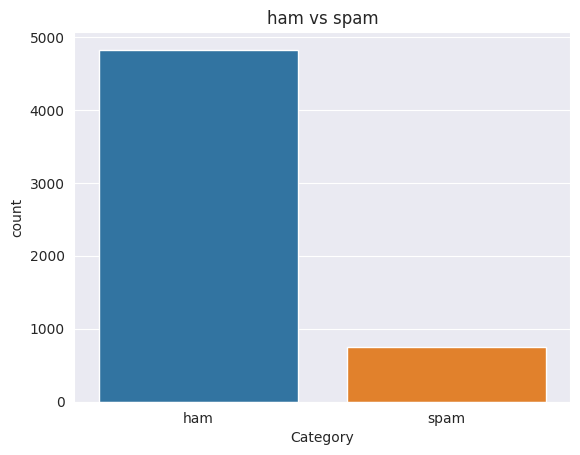

                                             Message  Label
0  go jurong point crazi avail bugi n great world...      0
1                              ok lar joke wif u oni      0
2  free entri wkli comp win fa cup final tkt st m...      1
3                u dun say earli hor u c alreadi say      0
4               nah think goe usf live around though      0
X_train: (4456,)


/home/viking/DEV/SpamFilter/datapreprocessing.py:96: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train = np.array(tokenizer.texts_to_sequences(X_train))
/home/viking/DEV/SpamFilter/datapreprocessing.py:97: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test = np.array(tokenizer.texts_to_sequences(X_test))


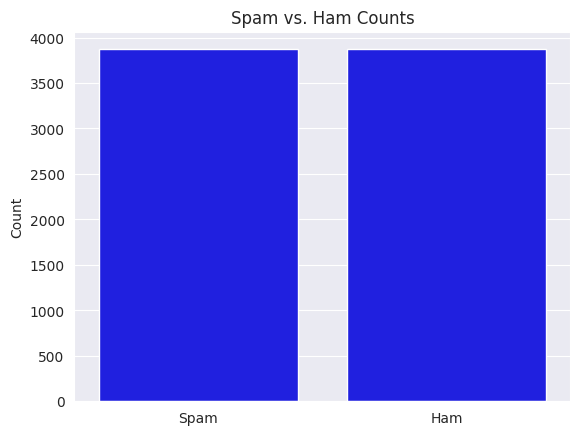

In [1]:
from datapreprocessing import get_cleaned_data
X_train, X_test, y_train, y_test, vocab_size, sentence_len = get_cleaned_data()

In [2]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler object to the data
scaler.fit(X_train)

# Transform the data using the scaler
X_train = scaler.transform(X_train)

In [3]:
# train our model
from sklearn.svm import SVC

clf = SVC(class_weight="balanced", kernel='poly', degree=7)
clf.fit(X_train, y_train)

# test our model
y_pred = clf.predict(X_test)

In [4]:
# evaluate our model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86       953
           1       0.35      0.65      0.46       162

    accuracy                           0.77      1115
   macro avg       0.64      0.72      0.66      1115
weighted avg       0.85      0.77      0.80      1115

[[756 197]
 [ 56 106]]
0.7730941704035874


[Text(0, 0.5, 'Not Spam'), Text(0, 1.5, 'Spam')]

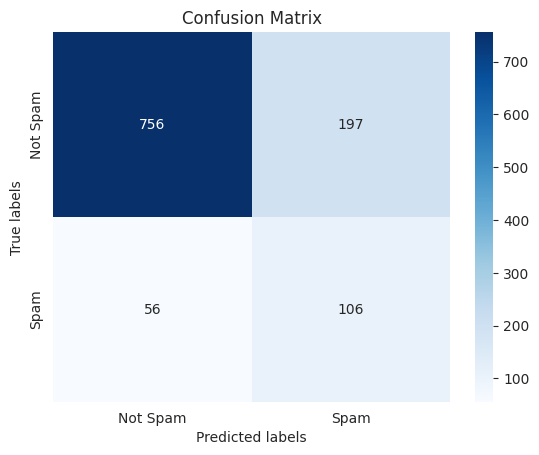

In [5]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, ax = ax,cmap='Blues',fmt='')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.xaxis.set_ticklabels(['Not Spam', 'Spam'])
ax.set_ylabel('True labels')
ax.yaxis.set_ticklabels(['Not Spam', 'Spam'])


In [ ]:
# Cross Validation of the SVM
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, scoring="precision")


print("Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
